<a href="https://colab.research.google.com/github/aninaredla/ML_Models_Unbalanced_Data/blob/main/m637_project_lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving corporate_rating.csv to corporate_rating.csv


In [ ]:
import pandas as pd
import numpy as np

# get the data
df = pd.read_csv('corporate_rating.csv')

# drop non-numerical predictors
df_numerical = df.drop(df.columns[1:6], axis=1)

df_numerical.head()

,Rating,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


Step 1: encode ratings into numbers and standardize numerical variables

Souces:
- python iterrows()
- (subject to making code more explicit)

In [ ]:
import time

start = time.perf_counter()
# add numerical ratings in proper order

df_numerical['Rating'] = df_numerical['Rating'].str.strip().str.upper()

rating_array = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'CC', 'C', 'D']
rating_values = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

for i, row in df_numerical.iterrows():
    for j in range(len(rating_array)):
        if row['Rating'] == rating_array[j]:
            df_numerical.at[i, 'Rating'] = rating_values[j]
            break

df_numerical['Rating'] = df_numerical['Rating'].astype(int)

end = time.perf_counter()

print(end-start)

df_numerical.head()

0.16200536799999554


,Rating,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,8,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,7,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,7,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,7,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,7,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


Step 2: split data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

# X contains predictors
X = df_numerical.iloc[:, 1:26]

# Y contains labels (ratings)
y = df_numerical.iloc[:, 0]

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X: (2029, 25)
Shape of y: (2029,)
Shape of X_train: (1623, 25)
Shape of X_test: (406, 25)
Shape of y_train: (1623,)
Shape of y_test: (406,)


In [ ]:
y_test

,Rating
1356,7
984,6
859,8
1983,6
1293,6
...,...
892,3
416,8
1843,5
1553,6


Step 3: Lasso Fit using LassoCV

In [ ]:
import time
from sklearn.linear_model import LassoCV


start = time.perf_counter()

# Fit LassoCV with cross-validation (default 5-fold)
lasso_cv = LassoCV(cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_train, y_train)

# Print the optimal alpha found
print("Optimal alpha (regularization parameter):", lasso_cv.alpha_)

coefficients = pd.Series(lasso_cv.coef_, index=X_train.columns)

print("Lasso Coefficients with Feature Names:")
print(coefficients)

num_nonzero_coefs = 0

for coef in coefficients:
  if coef != 0:
    num_nonzero_coefs += 1

# Make predictions on the test data
y_pred = lasso_cv.predict(X_test)

end = time.perf_counter()

print(f"Time elapsed: {end - start:.6f} seconds")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5043786661792637, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.318386747523846, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.709633974119924, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Conver

Optimal alpha (regularization parameter): 19.452580609048
Lasso Coefficients with Feature Names:
currentRatio                         -0.000000e+00
quickRatio                           -0.000000e+00
cashRatio                            -0.000000e+00
daysOfSalesOutstanding               -3.473520e-06
netProfitMargin                       0.000000e+00
pretaxProfitMargin                    0.000000e+00
grossProfitMargin                     0.000000e+00
operatingProfitMargin                 0.000000e+00
returnOnAssets                        0.000000e+00
returnOnCapitalEmployed               0.000000e+00
returnOnEquity                       -0.000000e+00
assetTurnover                        -0.000000e+00
fixedAssetTurnover                   -3.239542e-07
debtEquityRatio                      -0.000000e+00
debtRatio                            -0.000000e+00
effectiveTaxRate                     -0.000000e+00
freeCashFlowOperatingCashFlowRatio    0.000000e+00
freeCashFlowPerShare                

In [ ]:
max(coefficients)

8.915185716129617e-05

In [ ]:
num_nonzero_coefs

7

In [ ]:
len(coefficients)

25

In [ ]:
from sklearn.metrics import mean_squared_error

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.574609590833088


In [ ]:
y_pred.shape

(406,)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_rounded = np.round(y_pred).astype(int)
y_pred_rounded = np.clip(y_pred_rounded, 1, 10)

# Now compute accuracy
accuracy = accuracy_score(y_test, y_pred_rounded)
print("Prediction Accuracy:", accuracy)

Prediction Accuracy: 0.33497536945812806


In [ ]:
print("Accuracy (All):", float(f"{accuracy:.3f}")*100, "%")
print("MSE:", mse)
print(f"Time elapsed: {end - start:.6f} seconds")

Accuracy (All): 33.5 %
MSE: 1.574609590833088
Time elapsed: 0.662574 seconds


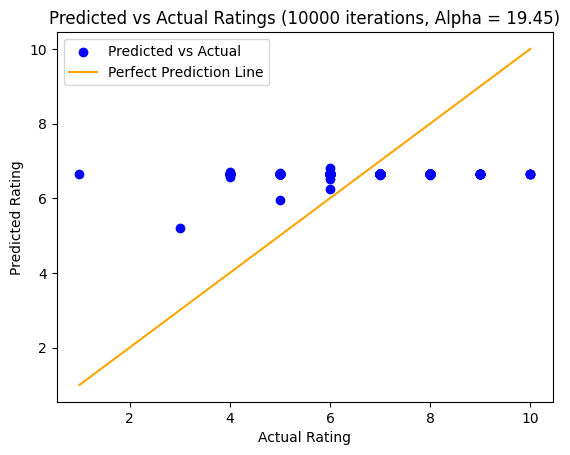

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Scatter plot of actual vs predicted ratings
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='orange', label='Perfect Prediction Line')

plt.title('Predicted vs Actual Ratings (10000 iterations, Alpha = 19.45)')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.legend()
plt.show()

Next Steps:
- divide all predictors into aforementioned categories and run Lasso on each
- compare results with overall
- plot individual features with result

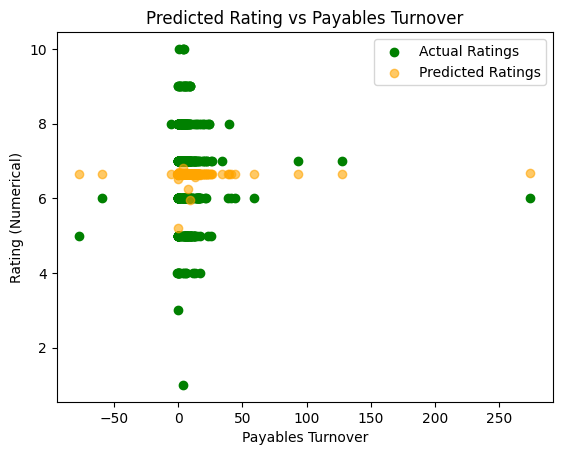

In [ ]:
# Extract the 26th feature (index 25), assumed to be 'Payables Turnover'
payables_turnover = X_test.iloc[:, 24]

# Plot actual vs predicted ratings
plt.scatter(payables_turnover, y_test, color='green', label='Actual Ratings')
plt.scatter(payables_turnover, y_pred, color='orange', label='Predicted Ratings', alpha=0.6)

plt.title('Predicted Rating vs Payables Turnover')
plt.xlabel('Payables Turnover')
plt.ylabel('Rating (Numerical)')
plt.legend()
plt.show()

In [ ]:
print(X_test.columns)

Index(['currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
       'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed',
       'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover',
       'debtEquityRatio', 'debtRatio', 'effectiveTaxRate',
       'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare',
       'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue',
       'enterpriseValueMultiple', 'operatingCashFlowPerShare',
       'operatingCashFlowSalesRatio', 'payablesTurnover'],
      dtype='object')


In [ ]:
times = []
accuracies = []
mses = []
iterations = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
optimal_alphas = []
non_nonzero_coefs_arr = []

for max_iter in iterations:
    start = time.perf_counter()

    lasso_cv = LassoCV(cv=5, max_iter=max_iter, random_state=42)
    lasso_cv.fit(X_train, y_train)

    optimal_alphas.append(lasso_cv.alpha_)

    coefficients = pd.Series(lasso_cv.coef_, index=X_train.columns)

    num_nonzero_coefs = 0

    for coef in coefficients:
      if coef != 0:
        num_nonzero_coefs += 1

    non_nonzero_coefs_arr.append(num_nonzero_coefs)

    # Predict
    y_pred = lasso_cv.predict(X_test)

    end = time.perf_counter()
    times.append(end - start)

    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)

    y_pred_rounded = np.round(y_pred).astype(int)
    y_pred_rounded = np.clip(y_pred_rounded, 1, 10)

    accuracy = accuracy_score(y_test, y_pred_rounded)
    accuracies.append(accuracy)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5043786661792637, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.318386747523846, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.709633974119924, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Conver

Accuracy (All): 33.5 %
MSE: 1.574609590833088
Time elapsed: 0.418060 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3673063371918488, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.273266919266916, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.785314117644475, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Converg

Accuracy (All): 33.5 %
MSE: 1.574724700582327
Time elapsed: 0.552032 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2686952192659646, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.89930073888695, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.615718860672814, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Converg

Accuracy (All): 33.5 %
MSE: 1.574724700582327
Time elapsed: 0.656322 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.197592652010826, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.527860529123245, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.8071647976116765, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Converg

Accuracy (All): 33.5 %
MSE: 1.574724700582327
Time elapsed: 0.753805 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5356272819308288, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.39369790915589, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.327910428742143, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Converge

Accuracy (All): 33.5 %
MSE: 1.574724700582327
Time elapsed: 0.834082 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.820633127919109, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8602192711982752, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.282487065349187, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Converg

Accuracy (All): 33.5 %
MSE: 1.574724700582327
Time elapsed: 0.957340 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3070002965780532, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8803345849769357, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.067822737271854, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Conver

Accuracy (All): 33.5 %
MSE: 1.574724700582327
Time elapsed: 1.045561 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9388346877042295, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.249331812375658, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.330404882283574, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Converg

Accuracy (All): 33.5 %
MSE: 1.574724700582327
Time elapsed: 1.517817 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6753063458950237, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8392895555323321, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8727858717795698, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Conve

Accuracy (All): 33.5 %
MSE: 1.574724700582327
Time elapsed: 2.151892 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.48679397097475885, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5701897497822301, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5828269659809848, tolerance: 0.19302602001539623
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Conv

Accuracy (All): 33.5 %
MSE: 1.574724700582327
Time elapsed: 1.328970 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.378925695983753, tolerance: 0.18969622786759013
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.371156195945105, tolerance: 0.18969622786759013
  model = cd_fast.enet_coordinate_descent_gram(


In [ ]:
i = 0
for max_iter in iterations:
    print("Accuracy (iteration", max_iter, "):", float(f"{accuracies[i]:.3f}")*100, "%")
    print("MSE:", float(f"{mses[i]:.3f}"))
    print(f"Time elapsed: {times[i]:.6f} seconds")
    print("")
    i += 1

Accuracy (iteration 10000 ): 33.5 %
MSE: 1.575
Time elapsed: 0.418060 seconds

Accuracy (iteration 20000 ): 33.5 %
MSE: 1.575
Time elapsed: 0.552032 seconds

Accuracy (iteration 30000 ): 33.5 %
MSE: 1.575
Time elapsed: 0.656322 seconds

Accuracy (iteration 40000 ): 33.5 %
MSE: 1.575
Time elapsed: 0.753805 seconds

Accuracy (iteration 50000 ): 33.5 %
MSE: 1.575
Time elapsed: 0.834082 seconds

Accuracy (iteration 60000 ): 33.5 %
MSE: 1.575
Time elapsed: 0.957340 seconds

Accuracy (iteration 70000 ): 33.5 %
MSE: 1.575
Time elapsed: 1.045561 seconds

Accuracy (iteration 80000 ): 33.5 %
MSE: 1.575
Time elapsed: 1.517817 seconds

Accuracy (iteration 90000 ): 33.5 %
MSE: 1.575
Time elapsed: 2.151892 seconds

Accuracy (iteration 100000 ): 33.5 %
MSE: 1.575
Time elapsed: 1.328970 seconds



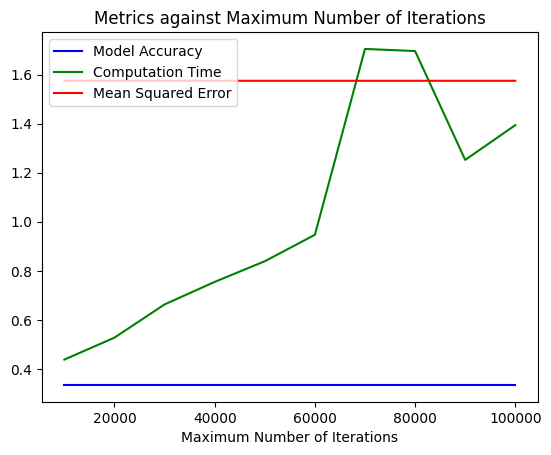

0.33497536945812806

In [ ]:
plt.plot(iterations, accuracies, color='blue', label='Model Accuracy')
plt.plot(iterations, times, color='green', label='Computation Time')
plt.plot(iterations, mses, color='red', label='Mean Squared Error')
plt.title("Metrics against Maximum Number of Iterations")
plt.legend(loc = "upper left")
plt.xlabel("Maximum Number of Iterations")
plt.show()
accuracies[9]


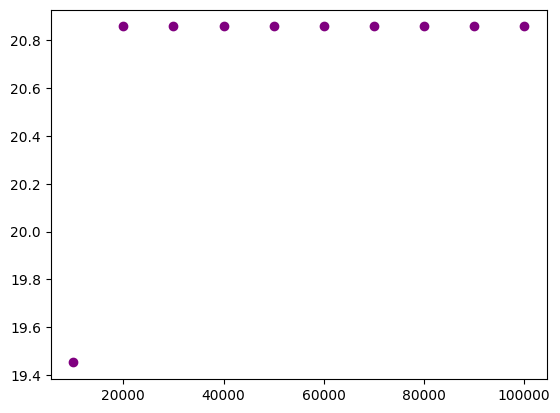

In [ ]:
plt.scatter(iterations, optimal_alphas, color='purple', label='Optimal Alpha')
plt.show()

In [ ]:
optimal_alphas

[np.float64(19.452580609048),
 np.float64(20.85836457059578),
 np.float64(20.85836457059578),
 np.float64(20.85836457059578),
 np.float64(20.85836457059578),
 np.float64(20.85836457059578),
 np.float64(20.85836457059578),
 np.float64(20.85836457059578),
 np.float64(20.85836457059578),
 np.float64(20.85836457059578)]

In [ ]:
non_nonzero_coefs_arr

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]

In [ ]:
times

[0.43827694299943687,
 0.5278113979984482,
 0.6631113069997809,
 0.7549687509999785,
 0.8391286490004859,
 0.9469427100011671,
 1.7045444479990692,
 1.6957664000001387,
 1.2522242380000534,
 1.3937582729995484]